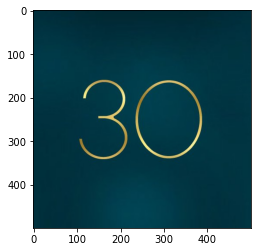

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import fftpack
import scipy

current_path = os.getcwd()
img_path = os.path.join(current_path, "../data/30.jpg")
img = cv2.imread(img_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def plt_imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
plt_imshow(img)

In [2]:
def create_gaussian_kernel(half_window_size=1, sig=1.):
    length = 2 * half_window_size + 1
    ax = np.linspace(-half_window_size, half_window_size, length)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)

    return kernel / np.sum(kernel)

In [3]:
gaussian = create_gaussian_kernel(3, 1.)

In [4]:
def draw_gaussian_kernel(half_window_size=1, sig=1.):
    length = 2 * half_window_size + 1
    x=np.linspace(-half_window_size,half_window_size, num=length)
    y=np.linspace(-half_window_size,half_window_size, num=length)
    x, y = np.meshgrid(x, y)
    z= create_gaussian_kernel(half_window_size, sig)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x,y,z, cmap=mpl.cm.jet)
    plt.show()

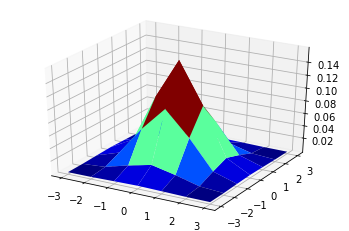

In [5]:
draw_gaussian_kernel(3, 1.)

[[15.90980249 21.41460623 22.64289397 ... 24.37484389 23.0526047
  17.12673974]
 [21.77619229 29.31077135 30.99196319 ... 32.80855838 31.02882342
  23.0526047 ]
 [23.43355283 31.54157989 33.35072527 ... 34.69037444 32.80855838
  24.37484389]
 ...
 [25.071268   33.74594576 35.681528   ... 38.65498867 36.55810791
  27.16054034]
 [23.71125054 31.91536123 33.74594576 ... 36.55810791 34.57497467
  25.68718809]
 [17.61607516 23.71125054 25.071268   ... 27.16054034 25.68718809
  19.08408143]]


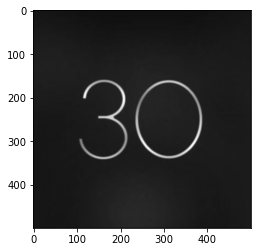

In [6]:
filtered_opencv_gray = cv2.filter2D(gray_img.astype(np.float64),-1,gaussian,borderType=cv2.BORDER_CONSTANT)
plt.imshow(filtered_opencv_gray, cmap='gray')
print(filtered_opencv_gray)

[[15.90980249 21.41460623 22.64289397 ... 24.37484389 23.0526047
  17.12673974]
 [21.77619229 29.31077135 30.99196319 ... 32.80855838 31.02882342
  23.0526047 ]
 [23.43355283 31.54157989 33.35072527 ... 34.69037444 32.80855838
  24.37484389]
 ...
 [25.071268   33.74594576 35.681528   ... 38.65498867 36.55810791
  27.16054034]
 [23.71125054 31.91536123 33.74594576 ... 36.55810791 34.57497467
  25.68718809]
 [17.61607516 23.71125054 25.071268   ... 27.16054034 25.68718809
  19.08408143]]


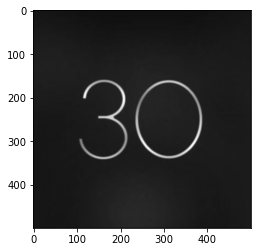

In [7]:
import scipy.signal as signal

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
filtered_scipy_gray=signal.convolve2d(gray_img, gaussian, mode="same", boundary="fill", fillvalue=0)
plt.imshow(filtered_scipy_gray, cmap='gray')
print(filtered_scipy_gray)

In [8]:
img_height, img_width = img.shape[:2]
kernel_length = 2 * 3 + 1
W = img_width - kernel_length
H = img_height - kernel_length
start_row = W - W // 2
start_col = H - H // 2

[[15.90980249 21.41460623 22.64289397 ... 24.37484389 23.0526047
  17.12673974]
 [21.77619229 29.31077135 30.99196319 ... 32.80855838 31.02882342
  23.0526047 ]
 [23.43355283 31.54157989 33.35072527 ... 34.69037444 32.80855838
  24.37484389]
 ...
 [25.071268   33.74594576 35.681528   ... 38.65498867 36.55810791
  27.16054034]
 [23.71125054 31.91536123 33.74594576 ... 36.55810791 34.57497467
  25.68718809]
 [17.61607516 23.71125054 25.071268   ... 27.16054034 25.68718809
  19.08408143]]


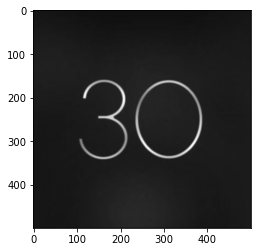

In [9]:
filtered_scipy_fft_gray=signal.fftconvolve(gray_img, gaussian, mode='same')
plt.imshow(filtered_scipy_gray, cmap='gray')
print(filtered_scipy_fft_gray)

In [10]:
s1 = gray_img.shape
s2 = gaussian.shape
shape = list(np.add(s1, s2) - 1)

sp1 = fftpack.fft2(gray_img, shape)
sp2 = scipy.fft.fft2(gaussian, shape)

# sp2 can also be calculated as the following
gaussian_pad = np.zeros(shape, dtype=np.float64)
gaussian_pad[:7, :7] = gaussian
guassian_pad_ft = scipy.fft.fft2(gaussian_pad)

ret = fftpack.ifft2(sp1 * guassian_pad_ft, shape).real

[[15.90980249 21.41460623 22.64289397 ... 24.37484389 23.0526047
  17.12673974]
 [21.77619229 29.31077135 30.99196319 ... 32.80855838 31.02882342
  23.0526047 ]
 [23.43355283 31.54157989 33.35072527 ... 34.69037444 32.80855838
  24.37484389]
 ...
 [25.071268   33.74594576 35.681528   ... 38.65498867 36.55810791
  27.16054034]
 [23.71125054 31.91536123 33.74594576 ... 36.55810791 34.57497467
  25.68718809]
 [17.61607516 23.71125054 25.071268   ... 27.16054034 25.68718809
  19.08408143]]


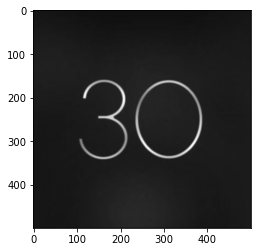

In [11]:
def _centered(arr, newshape):
    # Return the center newshape portion of the array.
    newshape = np.asarray(newshape)
    currshape = np.array(arr.shape)
    startind = (currshape - newshape) // 2
    endind = startind + newshape
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]


img2 = _centered(ret, s1)
plt.imshow(img2, cmap="gray")
print(img2)